In [3]:
""" this script is used to train the model """
import os
import json
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [10]:
# specify the path to the JSON file
json_path = r"C:\Users\Tototime\Desktop\Project_DataMining\database.json"


# load the data
with open(json_path, 'r') as f:
    data = json.load(f)
    X = []
    Y = []
    for image in data.values():
        # get the features
        features = []
        if 'tags' in image:
            for tags in image['tags']:
                if tags.split(":")[0] == 'Generation':
                    features.append(int(tags.split(":")[1]))
            X.append(features[0])
        else:
            X.append(-1)
        # get the target
        color = image['couleur']['couleur dominante']
        if color == "rouge":
            Y.append(0)
        elif color == "vert":
            Y.append(1)
        else:
            Y.append(2)


In [11]:
# convert the data to numpy arrays
x = np.array(X)
y = np.array(Y)

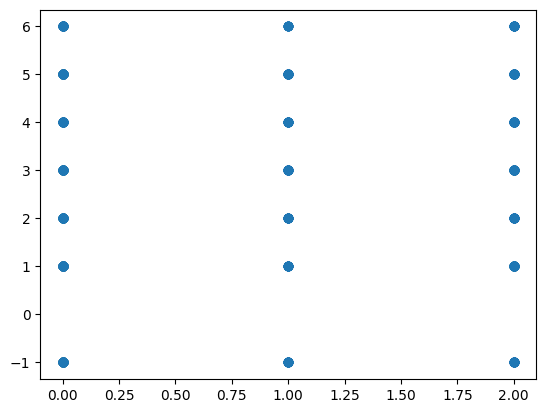

In [23]:
# plot the data to see the distribution of the colors
plot.scatter(y, x)
plot.show()
        


In [24]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


ValueError: Expected 2D array, got 1D array instead:
array=[-1.  4.  1.  5.  5.  6.  3.  3.  4.  2.  1.  5.  1.  1.  6.  6. -1.  5.
  4.  1.  3.  5.  3.  2.  1.  2.  3.  5.  3.  3. -1. -1.  1. -1.  3.  5.
  6. -1.  4.  3.  1.  1.  1.  5.  5.  6.  4.  1.  1.  1.  3.  4.  5.  1.
  5.  5.  3.  6. -1. -1.  2.  2. -1.  3.  1. -1.  4. -1.  2.  3.  3.  3.
  2.  3. -1.  5.  2.  4.  6.  3. -1.  2.  3.  3.  5.  1.  5.  4. -1.  3.
 -1.  1.  2.  2.  4.  5.  1. -1.  6.  2.  3.  4.  1.  1.  3.  2.  3.  2.
  4.  4.  5. -1.  2.  3.  5. -1.  1.  2.  5.  4.  3.  2.  6.  5.  5.  1.
  1.  5.  4.  5.  3.  5.  1.  3.  6. -1.  6.  1. -1.  6.  1.  4.  6.  2.
  3.  5.  5.  3.  4.  2.  5.  4.  4.  3.  5.  4.  3.  4.  3.  5. -1.  3.
  5.  2.  3.  2. -1.  3. -1.  1.  5.  3.  1. -1.  6.  1.  5.  2.  4.  2.
  1.  1.  2.  5.  4.  2.  4.  1.  5.  3.  1.  3. -1.  2. -1.  2.  3.  5.
  5.  6.  1.  1. -1.  2.  2.  5. -1.  4.  5.  3.  1.  4.  1.  5.  5. -1.
  1.  2.  3. -1. -1.  1.  5.  3.  1. -1.  4. -1.  5.  1. -1.  5.  3.  4.
  4.  3.  6. -1.  5.  6. -1.  5.  5. -1. -1.  5.  2.  5.  6.  1.  1.  3.
  2. -1.  4. -1.  4.  1.  1. -1.  4. -1.  2.  2.  1.  3.  1.  3. -1. -1.
  5. -1. -1. -1.  5. -1.  5.  2.  1.  1.  4. -1.  2.  5.  5.  1.  3.  1.
  1.  4. -1.  5.  5. -1.  1. -1.  3.  6.  1.  3.  4.  5.  5.  2.  1.  4.
  6.  5.  3.  5.  5.  5.  5.  2.  2.  2.  3.  1.  5.  3.  1.  5.  4. -1.
  5. -1.  3.  4.  6. -1.  1. -1.  5. -1.  5. -1.  5. -1.  3.  6.  4.  3.
  1.  3. -1.  1. -1.  1.  5.  4.  1.  5.  6.  6. -1.  3.  3.  4.  4.  3.
  1.  1.  1.  1.  1. -1.  2.  1.  5.  5.  6. -1. -1.  5.  2.  2.  1.  6.
  5.  3. -1.  4.  6.  1.  6.  2.  4.  2. -1.  5.  4.  1.  5.  5.  6.  3.
  5. -1.  2.  5.  1.  3.  3.  1.  1.  3.  1.  2.  1.  6.  1.  2.  2.  3.
  4.  5.  6.  1.  5.  3. -1.  4. -1.  3.  6.  3.  6. -1.  3.  1.  2.  1.
  3.  1.  6.  1.  4. -1. -1.  3.  2. -1.  5.  5.  5.  6. -1. -1.  3.  5.
  1.  4.  2.  3.  5.  5. -1.  6.  6.  1.  2.  1.  4.  3.  2. -1.  2.  2.
  3.  4.  5.  3.  5.  5.  5.  5.  1.  4. -1.  1.  5.  3.  5.  4.  2.  4.
  1.  2.  2.  2.  5. -1.  4.  5. -1.  3.  1.  6.  3.  4. -1. -1.  1.  3.
  3.  3.  3.  2.  5.  5.  3.  3.  1.  6.  1. -1.  4.  6.  1.  1.  6. -1.
 -1.  2.  3.  1.  1.  2.  1.  1.  1. -1.  5.  3.  2.  5. -1.  5.  2.  4.
 -1.  6.  1.  6.  1.  4.  5.  4.  3.  4.  5. -1.  4. -1. -1. -1. -1.  3.
  2.  6.  6.  1.  5.  3.  5.  4.  6.  3.  5.  2.  2.  2.  6.  1.  3.  3.
  2.  1.  5. -1. -1.  2.  2.  4.  2.  3.  1. -1.  3.  6.  4.  1.  1.  4.
  1. -1.  6.  4.  5.  1.  6.  2.  1. -1.  4.  5.  5.  2.  3. -1.  1.  5.
  5.  6.  3.  3.  4.  2.  5.  1.  2. -1.  4.  1.  6.  6.  2.  6.  2.  5.
  1.  1.  2.  2.  5.  4.  6.  3. -1.  1.  4.  2.  5.  1.  6.  3.  6.  1.
  3.  1.  6.  3.  5.  5.  5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# train the model
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
mlp.fit(X_train, y_train)

# make predictions
predictions = mlp.predict(X_test)


In [ ]:
# evaluate the model
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions, average='macro'))
print("Recall:", metrics.recall_score(y_test, predictions, average='macro'))
print("F1:", metrics.f1_score(y_test, predictions, average='macro'))



In [ ]:
# plot the confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["rouge", "vert", "bleu"])
disp.plot()
plot.show()
